# Import

In [2]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



data = pd.read_csv('training.csv')

df= pd.DataFrame(data)
oil_peak_rate = data['OilPeakRate']
drop_columns = ['Unnamed: 0','average_frac_fluid_per_stage', 'pad_id', 'average_proppant_per_stage', 'average_stage_length', 'number_of_stages', 'frac_type', 'batch_frac_classification', 'standardized_operator_name']
df = df.drop(columns=drop_columns, axis=1)


warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')


# Understanding Data

In [3]:
#Understanding data
df.head()

,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,...,frac_fluid_to_proppant_ratio,bin_lateral_length,relative_well_position,well_family_relationship,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,3963.582677,76000.0000,NaN,8712.598425,NaN,19.174572,...,NaN,1.0,Standalone Well,Standalone Well,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,3179.133858,113000.0000,5.610964e+05,8627.952756,NaN,35.544272,...,4.965455,1.0,Outer Well,Infill Child Well,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,3810.039370,286571.4286,1.621424e+06,8801.181102,NaN,75.214821,...,5.658008,1.0,Standalone Well,Standalone Well,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,3723.425197,106878.9286,4.377134e+05,8635.826772,NaN,28.704465,...,4.095414,1.0,Standalone Well,Standalone Well,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,3811.023622,112789.7143,6.229802e+05,8664.370079,NaN,29.595648,...,5.523377,1.0,Outer Well,Infill Child Well,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [4]:
df.shape

(29692, 22)

In [5]:
df.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'gross_perforated_length',
       'total_proppant', 'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'relative_well_position',
       'well_family_relationship', 'frac_seasoning', 'horizontal_midpoint_x',
       'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y',
       'OilPeakRate'],
      dtype='object')

In [6]:
df.dtypes

surface_x                       float64
surface_y                       float64
bh_x                            float64
bh_y                            float64
gross_perforated_length         float64
total_proppant                  float64
total_fluid                     float64
true_vertical_depth             float64
ffs_frac_type                    object
proppant_intensity              float64
frac_fluid_intensity            float64
proppant_to_frac_fluid_ratio    float64
frac_fluid_to_proppant_ratio    float64
bin_lateral_length              float64
relative_well_position           object
well_family_relationship         object
frac_seasoning                  float64
horizontal_midpoint_x           float64
horizontal_midpoint_y           float64
horizontal_toe_x                float64
horizontal_toe_y                float64
OilPeakRate                     float64
dtype: object

In [7]:
# Tidy data

df.isna().sum()

surface_x                           0
surface_y                           0
bh_x                             2087
bh_y                             2087
gross_perforated_length          7557
total_proppant                  10612
total_fluid                     10616
true_vertical_depth              1495
ffs_frac_type                   15107
proppant_intensity              10721
frac_fluid_intensity            10746
proppant_to_frac_fluid_ratio    11036
frac_fluid_to_proppant_ratio    11036
bin_lateral_length               7557
relative_well_position           9225
well_family_relationship         9225
frac_seasoning                  14924
horizontal_midpoint_x            1001
horizontal_midpoint_y            1001
horizontal_toe_x                  711
horizontal_toe_y                  711
OilPeakRate                     10386
dtype: int64

# Cleaning Data

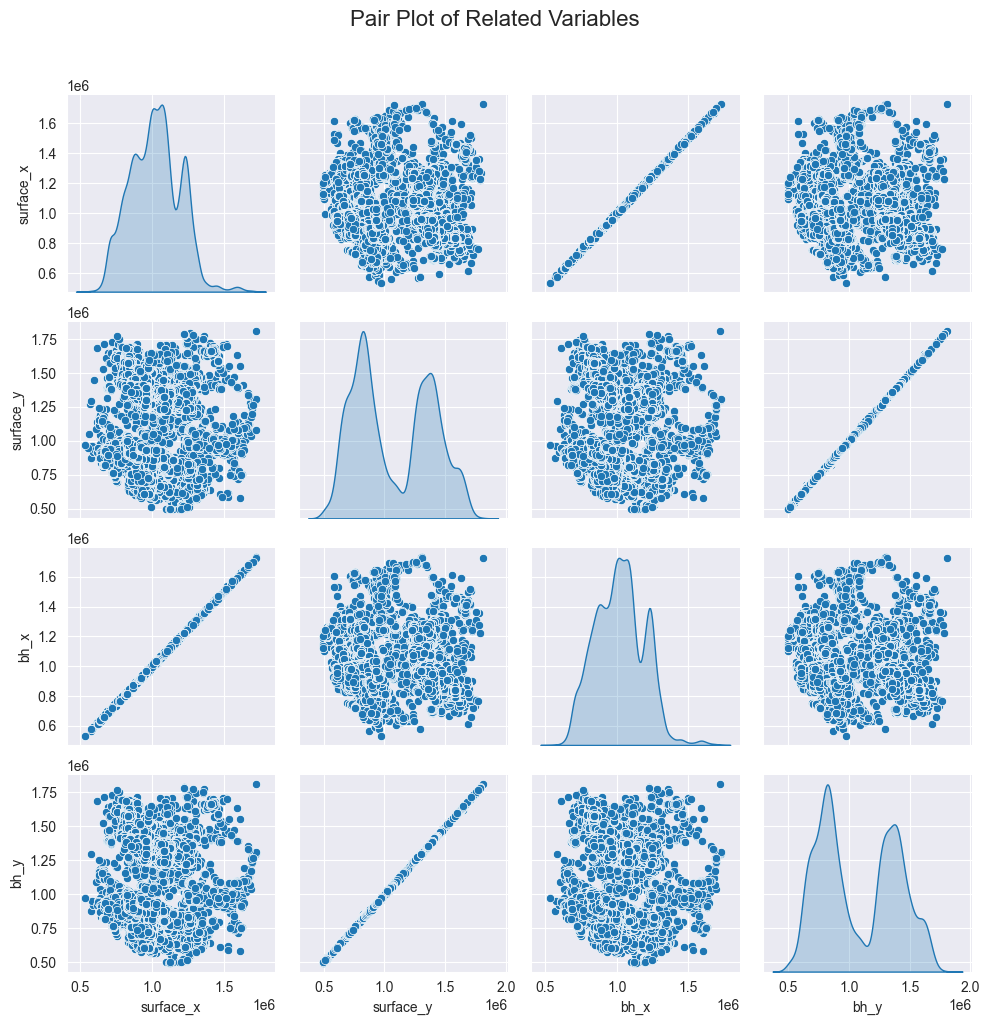

In [8]:
# Select the relevant columns
subset_columns_1 = ['surface_x', 'surface_y', 'bh_x', 'bh_y']

# Create a subset DataFrame with the selected columns
subset_df = df[subset_columns_1]

# Set a custom color palette
custom_palette = sns.color_palette("rocket", as_cmap=True)

# Pair plot with customization
sns.pairplot(subset_df, markers='o', diag_kind='kde')

# Add titles and labels
plt.suptitle('Pair Plot of Related Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

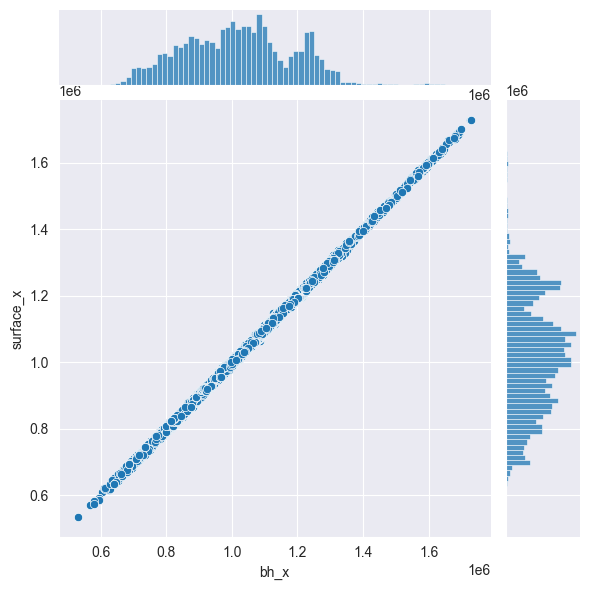

In [9]:

sns.jointplot(x = "bh_x", y = "surface_x", data =subset_df);
plt.show()


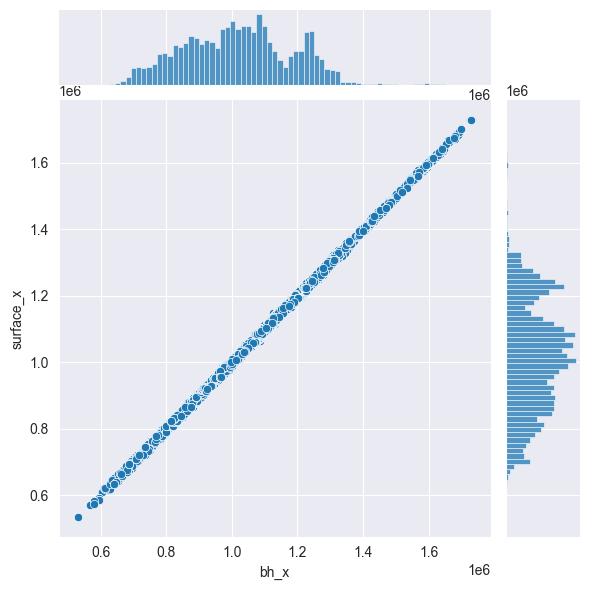

In [10]:
from sklearn.linear_model import LinearRegression

# Create a subset DataFrame with non-missing values in 'surface_x' and 'bh_x'
subset_df = df[['surface_x', 'bh_x']].dropna()

# Separate features (X) and target variable (y)
X = subset_df[['surface_x']]
y = subset_df['bh_x']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Identify rows with missing values in 'bh_x'
missing_bh_x_rows = df['bh_x'].isna()

# Use the model to predict missing values in 'bh_x'
df.loc[missing_bh_x_rows, 'bh_x'] = model.predict(df.loc[missing_bh_x_rows, ['surface_x']])

sns.jointplot(x = "bh_x", y = "surface_x", data =subset_df);
plt.show()


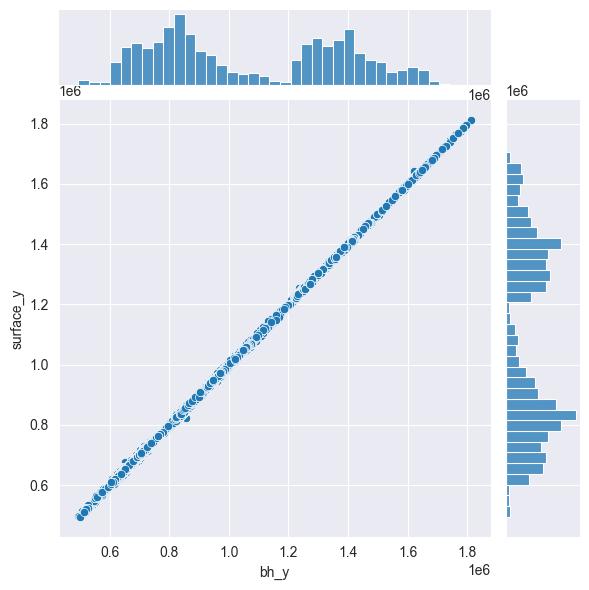

In [11]:
# Create a subset DataFrame with non-missing values in 'surface_y' and 'bh_y'
subset_df_y = df[['surface_y', 'bh_y']].dropna()

# Separate features (X) and target variable (y)
X_y = subset_df_y[['surface_y']]
y_y = subset_df_y['bh_y']

# Create a linear regression model
model_y = LinearRegression()
model_y.fit(X_y, y_y)

# Identify rows with missing values in 'bh_y'
missing_bh_y_rows = df['bh_y'].isna()

# Use the model to predict missing values in 'bh_y'
df.loc[missing_bh_y_rows, 'bh_y'] = model_y.predict(df.loc[missing_bh_y_rows, ['surface_y']])


sns.jointplot(x = "bh_y", y = "surface_y", data =df);
plt.show()

In [12]:
#Impute columns
from sklearn.impute import KNNImputer

# Columns to impute
columns_to_impute = ['horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y']
# Extract the columns to impute
impute_data = df[columns_to_impute]

# Initialize KNNImputer with desired parameters
knn_imputer = KNNImputer(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Fit and transform the selected columns
imputed_values = knn_imputer.fit_transform(impute_data)

# Replace the original NaN values with the imputed values
df[columns_to_impute] = imputed_values

In [13]:
df.isna().sum()

surface_x                           0
surface_y                           0
bh_x                                0
bh_y                                0
gross_perforated_length          7557
total_proppant                  10612
total_fluid                     10616
true_vertical_depth              1495
ffs_frac_type                   15107
proppant_intensity              10721
frac_fluid_intensity            10746
proppant_to_frac_fluid_ratio    11036
frac_fluid_to_proppant_ratio    11036
bin_lateral_length               7557
relative_well_position           9225
well_family_relationship         9225
frac_seasoning                  14924
horizontal_midpoint_x               0
horizontal_midpoint_y               0
horizontal_toe_x                    0
horizontal_toe_y                    0
OilPeakRate                     10386
dtype: int64

# Plotting Data

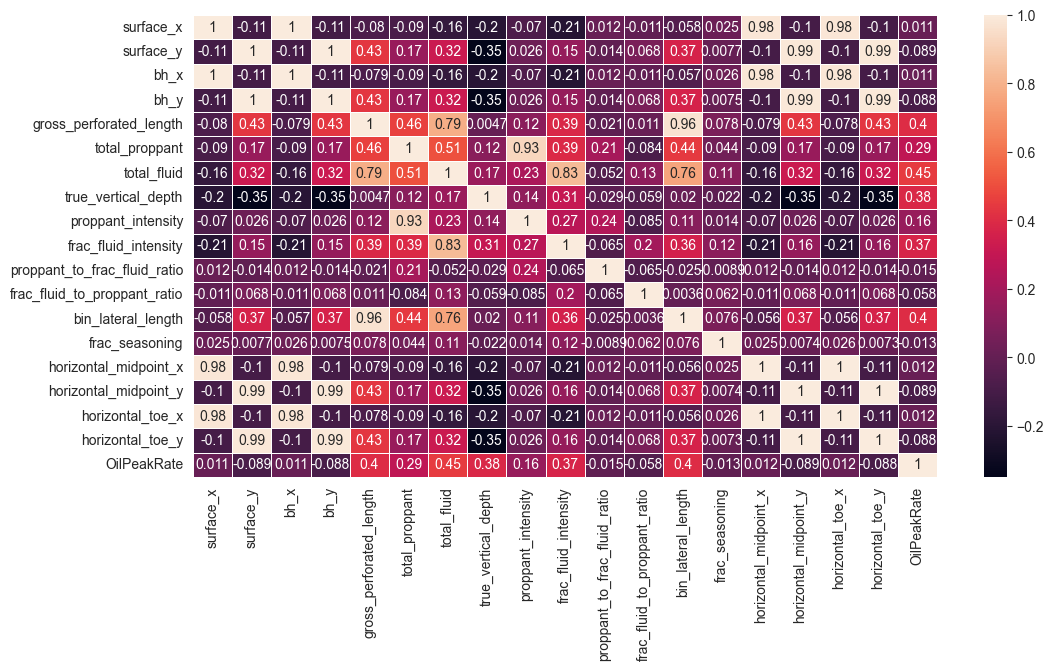

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
sns.heatmap(newdf.corr(), annot=True, linewidths=.5)
plt.show()

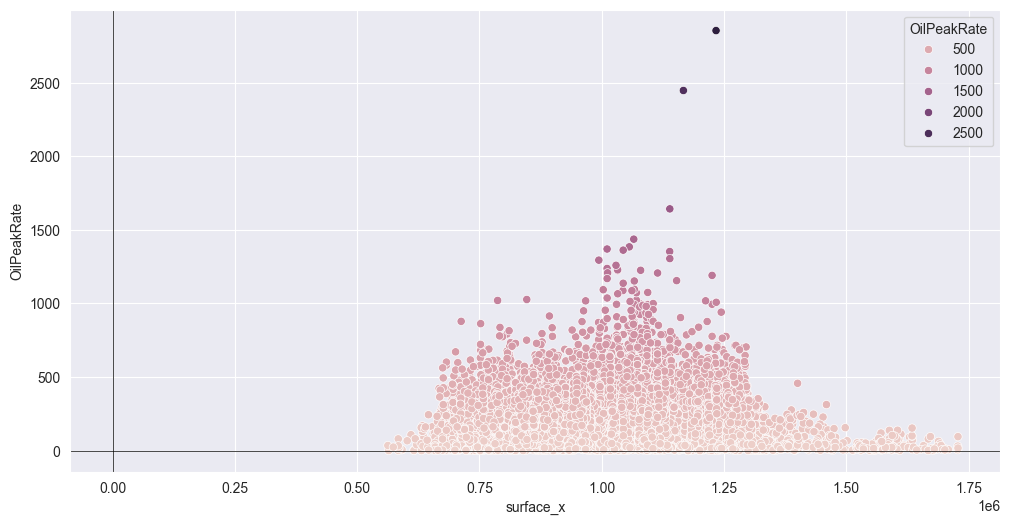

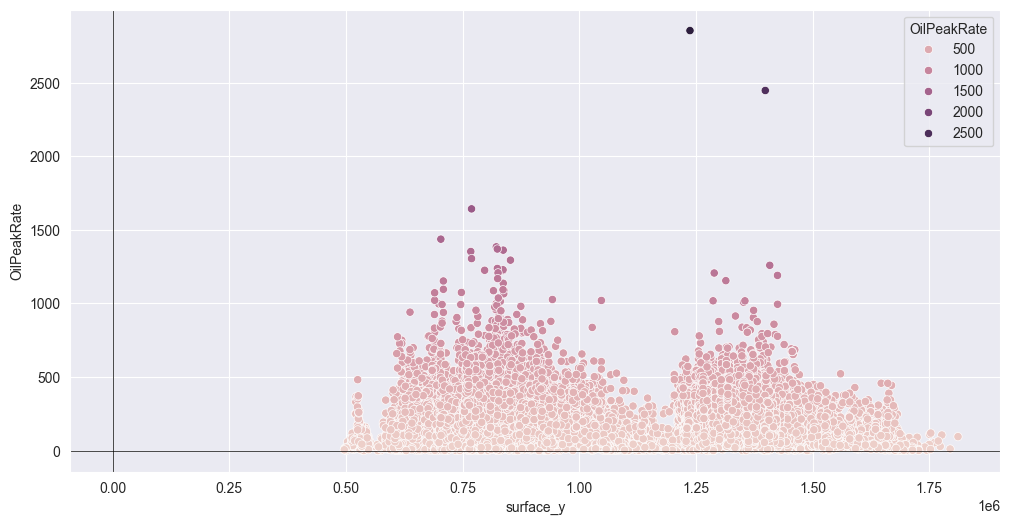

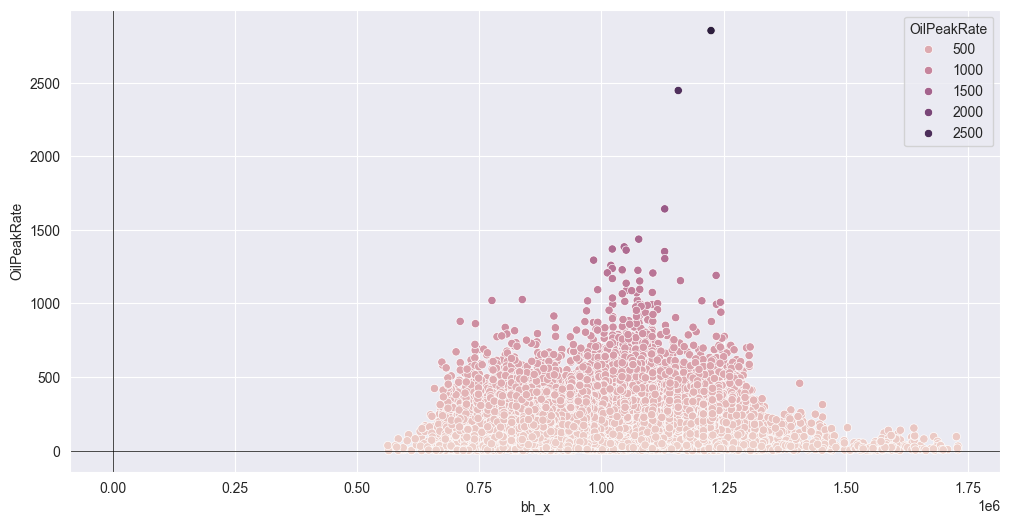

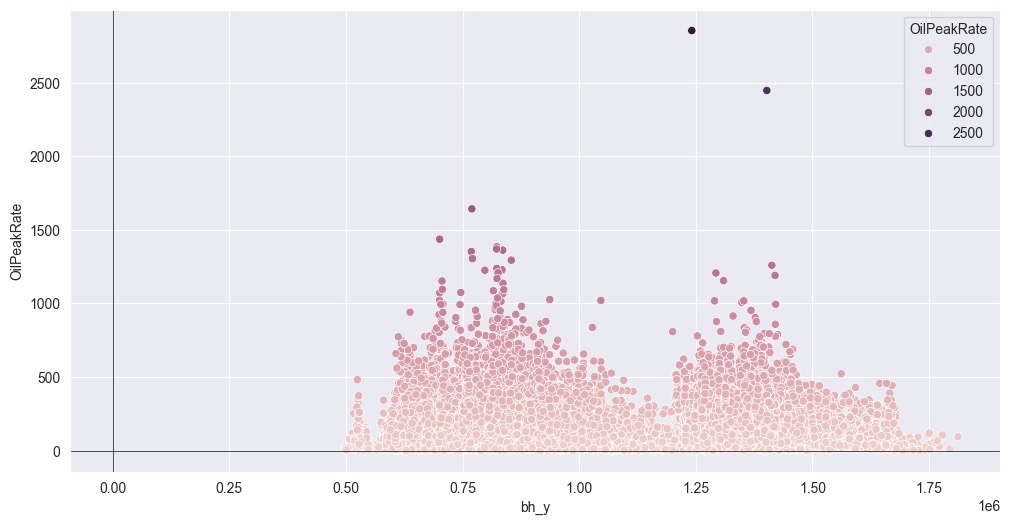

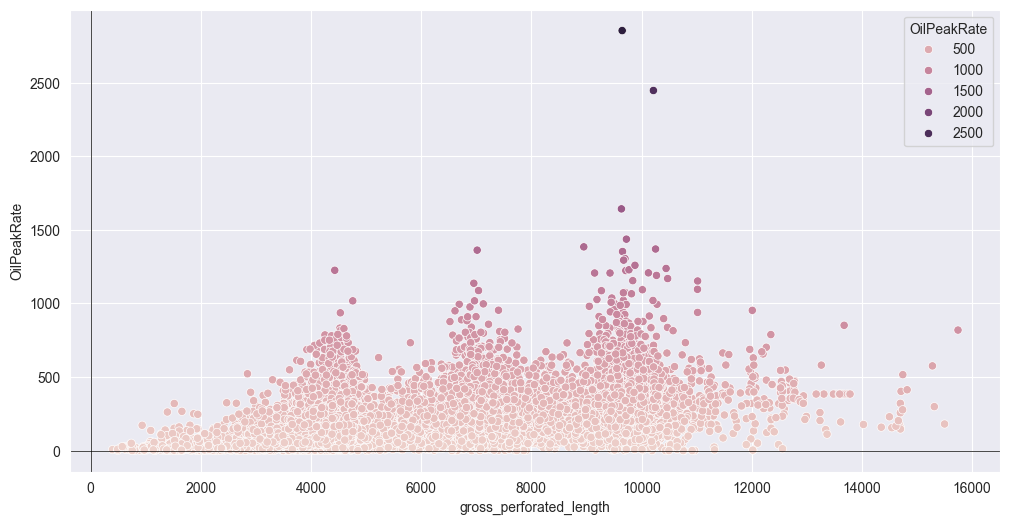

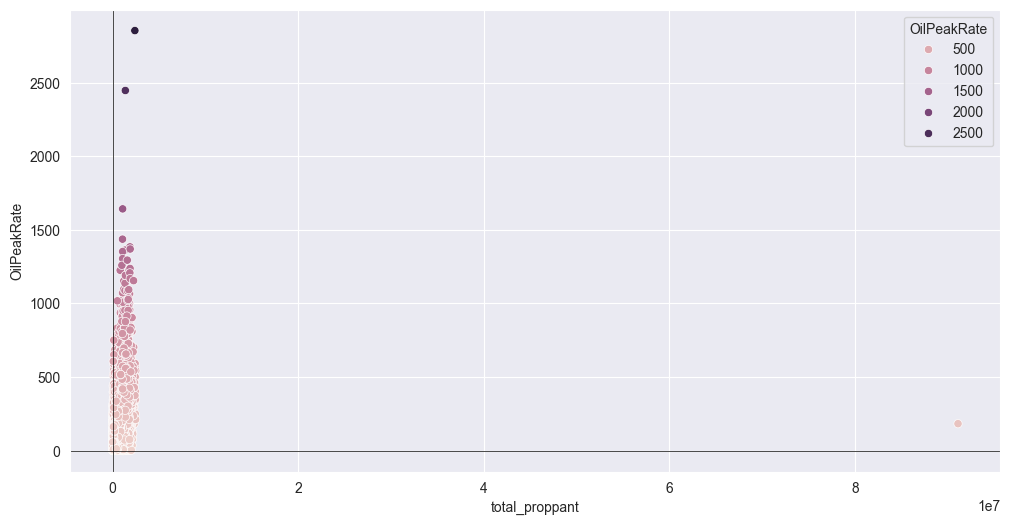

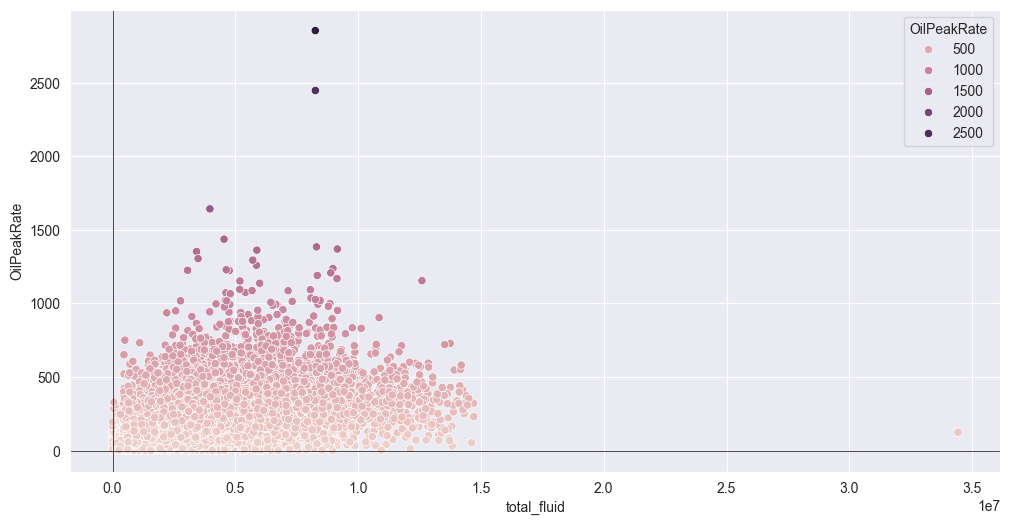

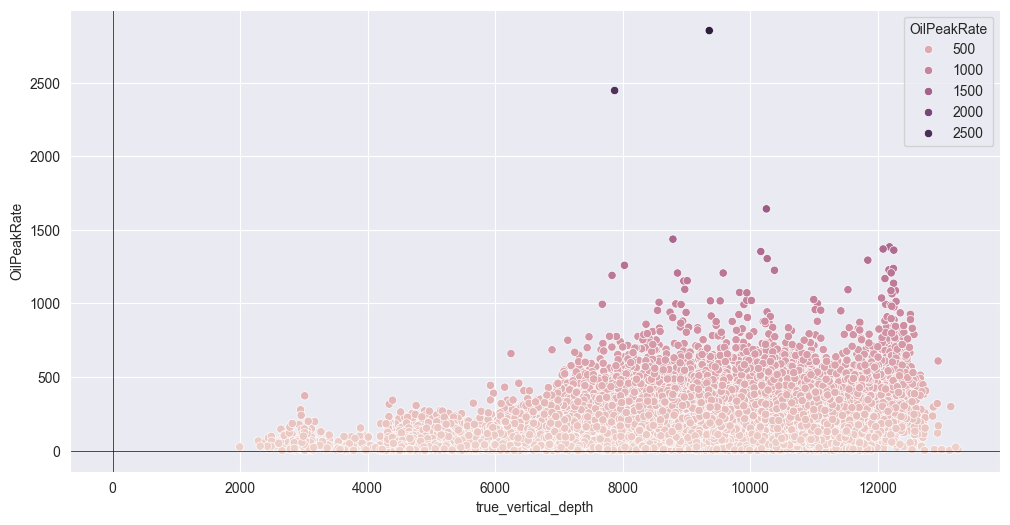

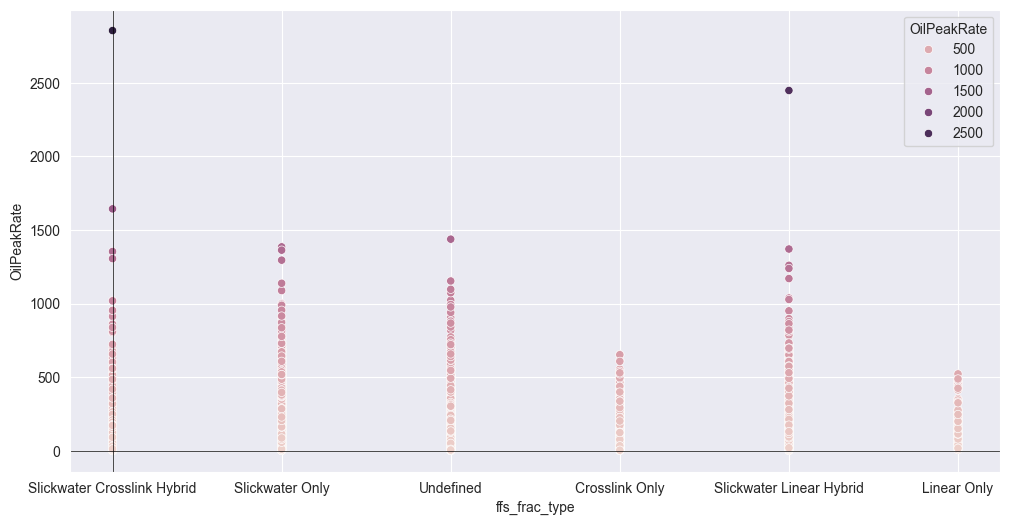

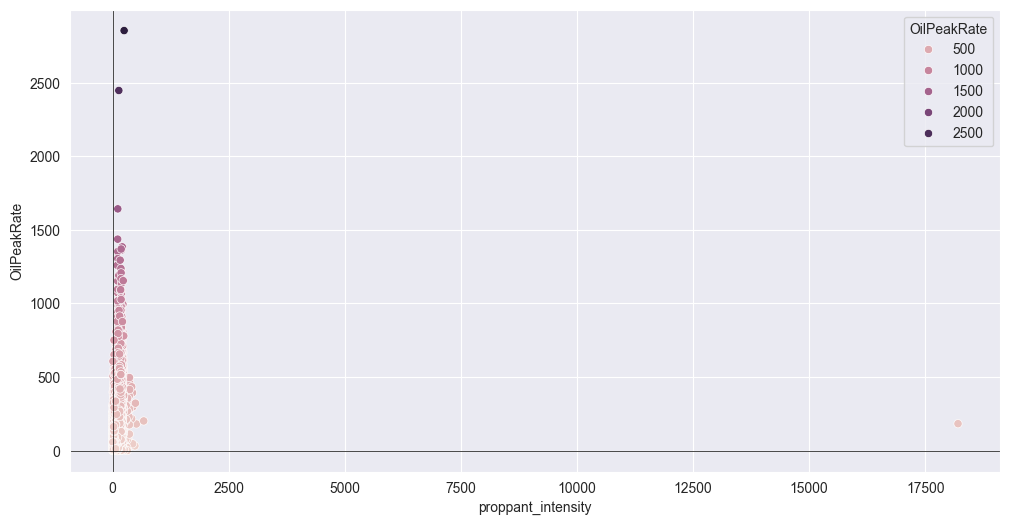

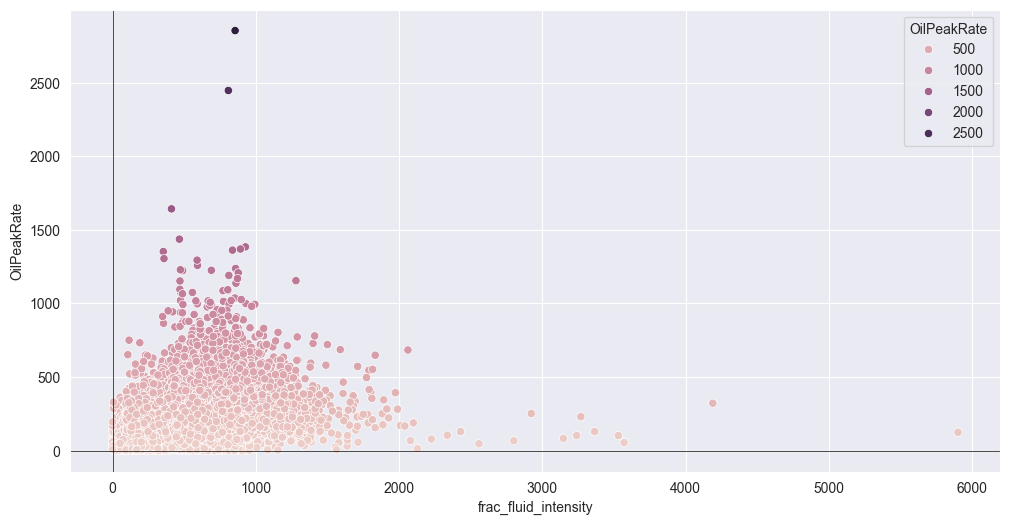

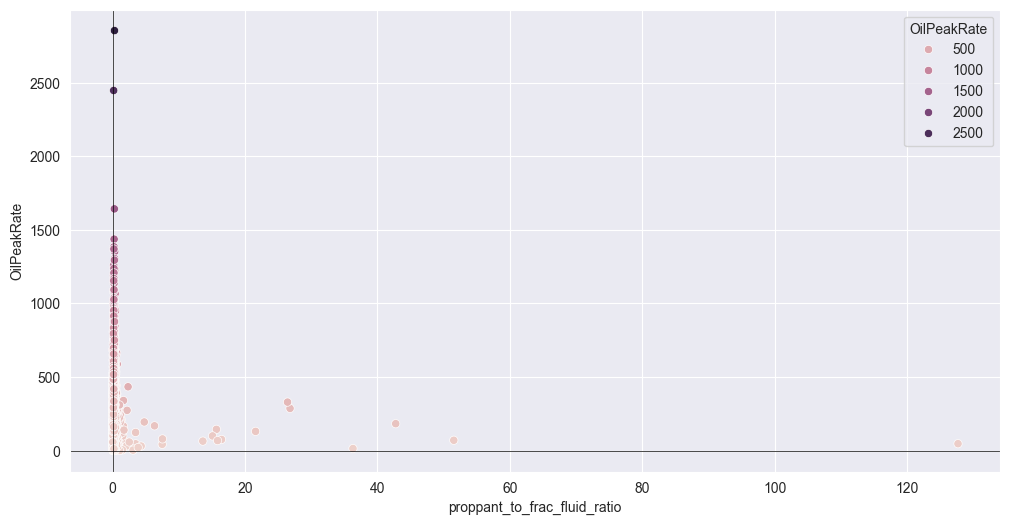

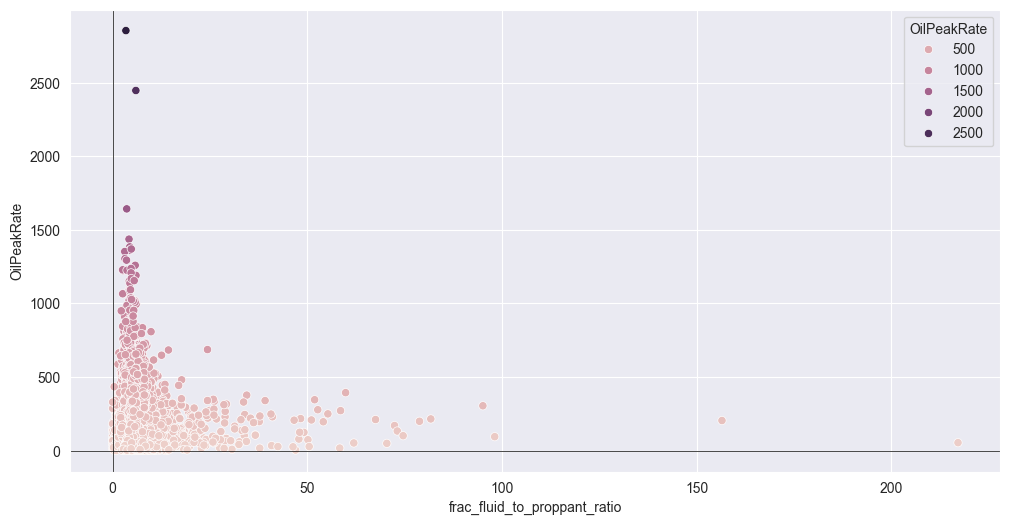

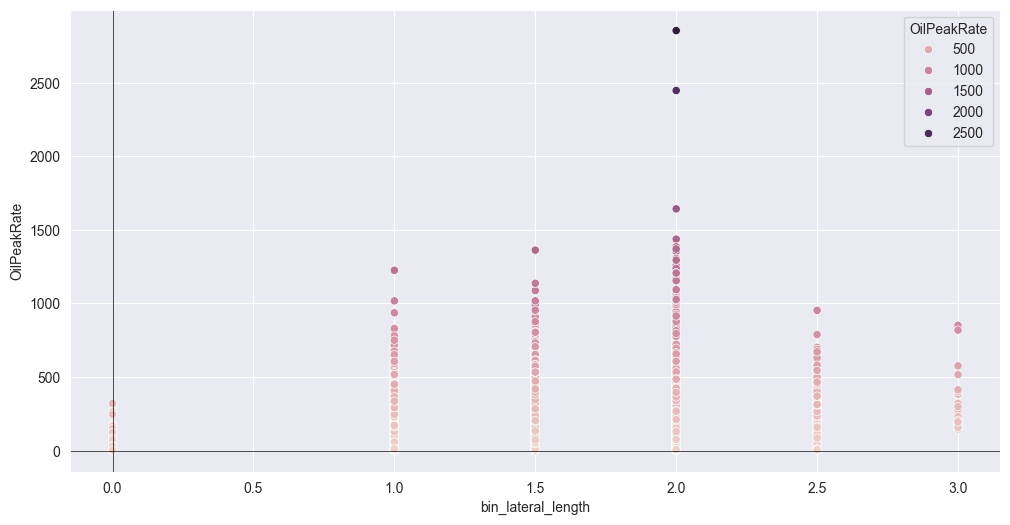

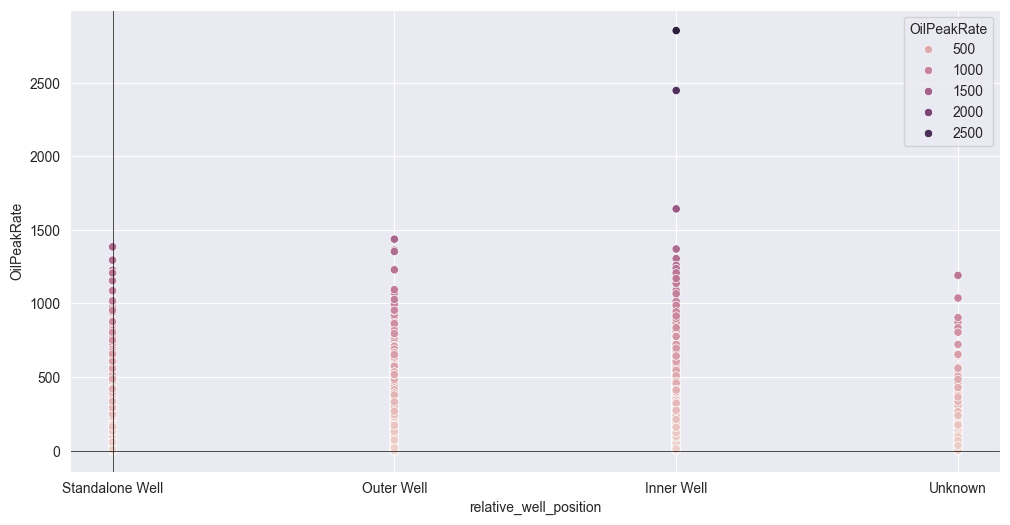

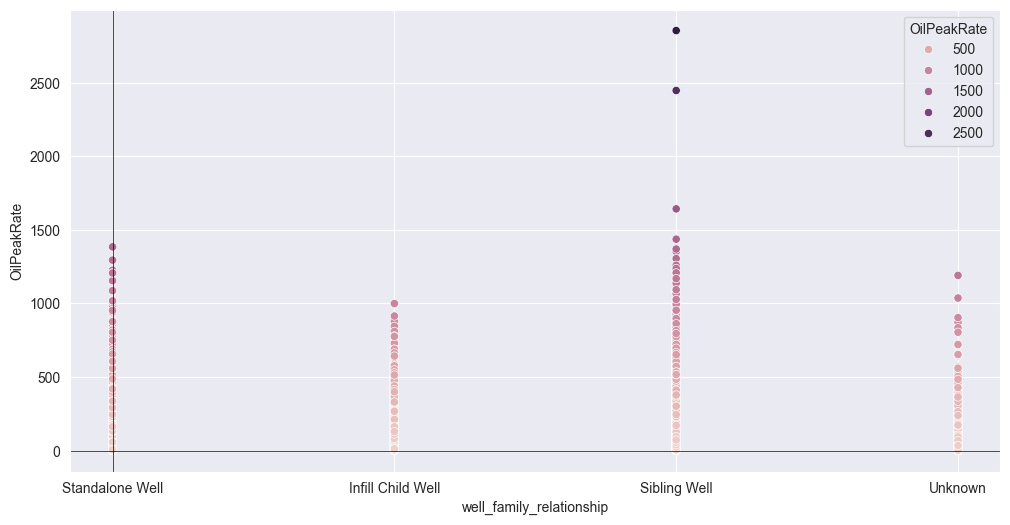

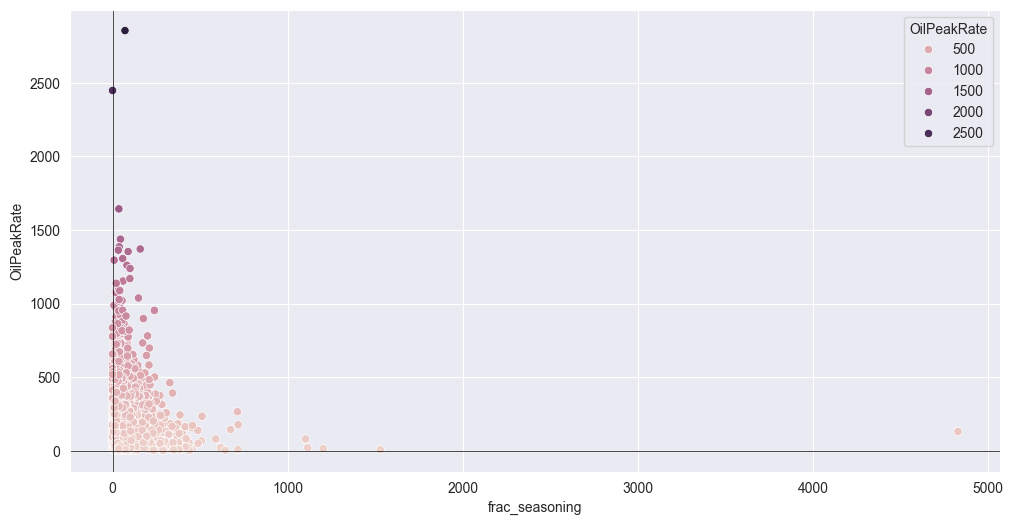

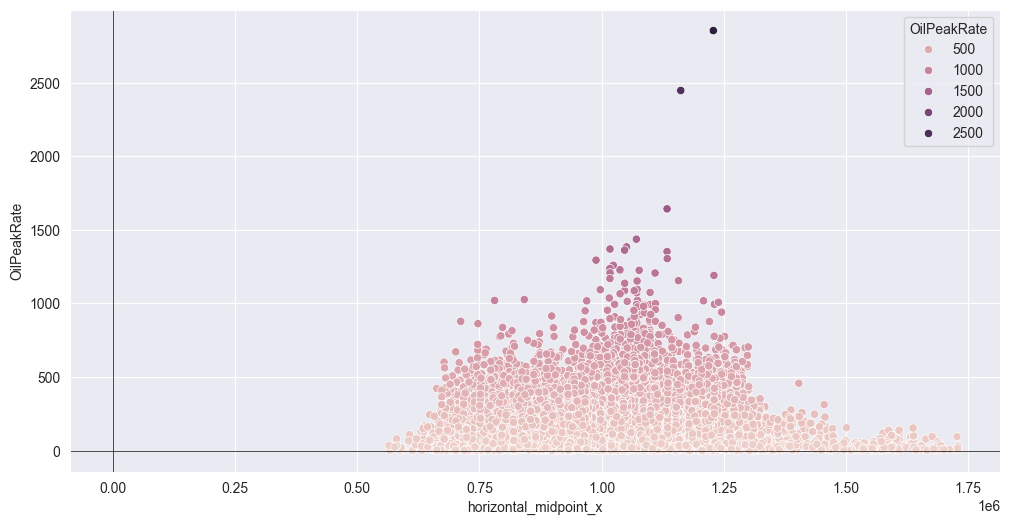

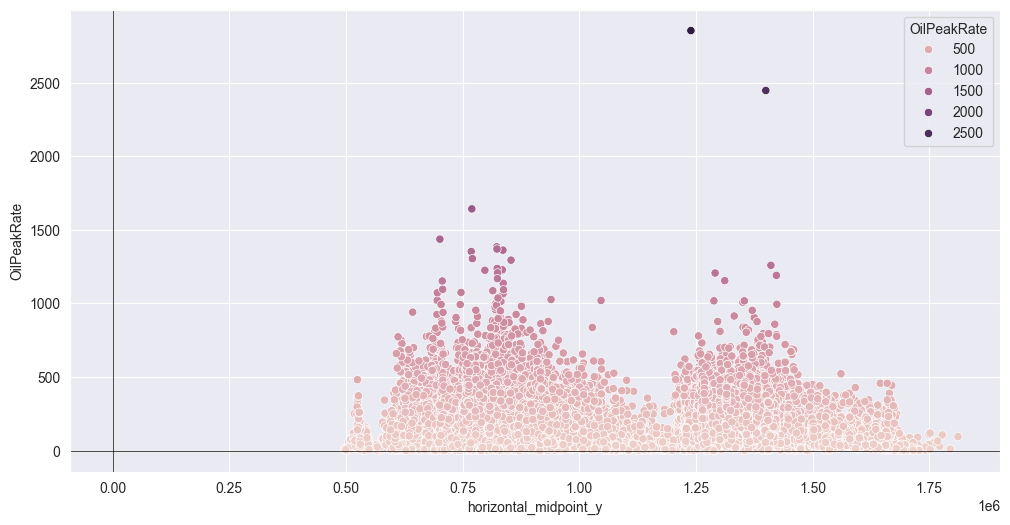

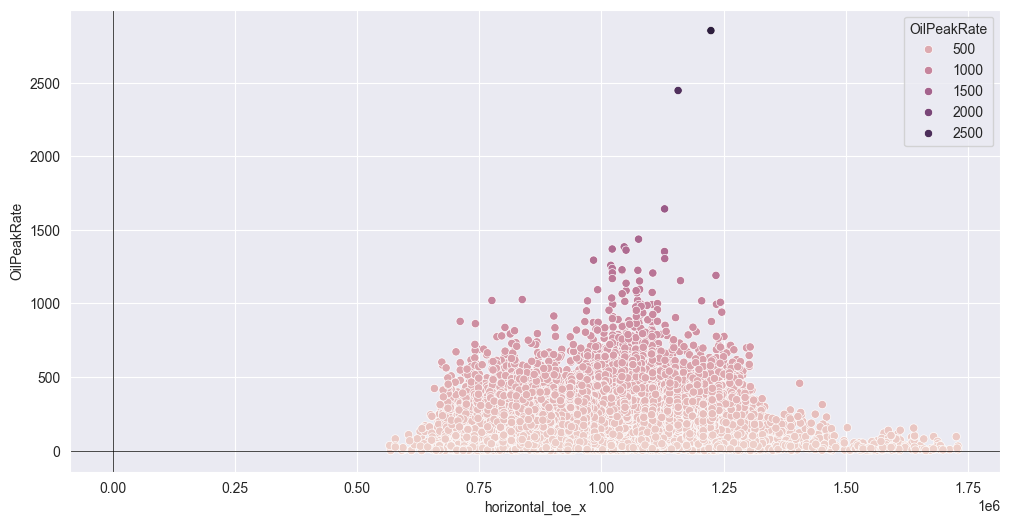

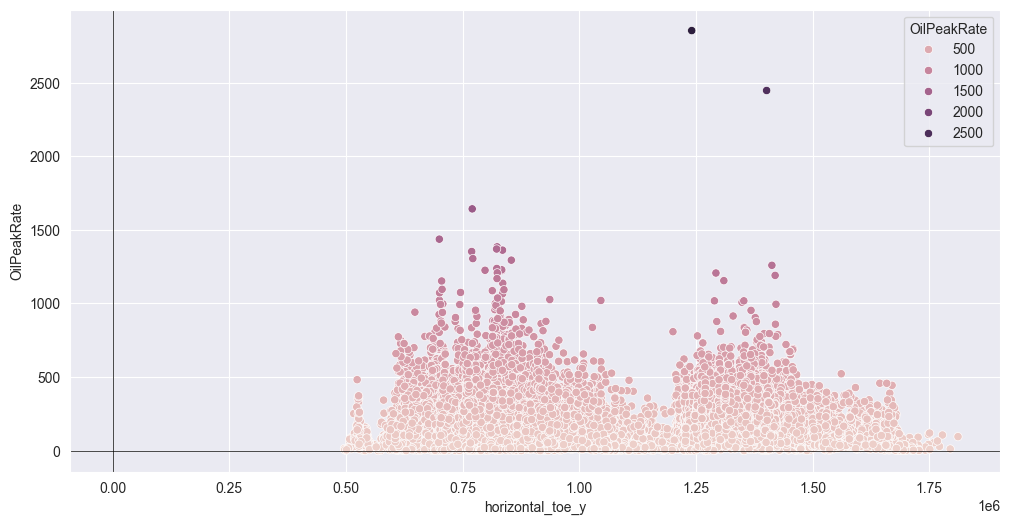

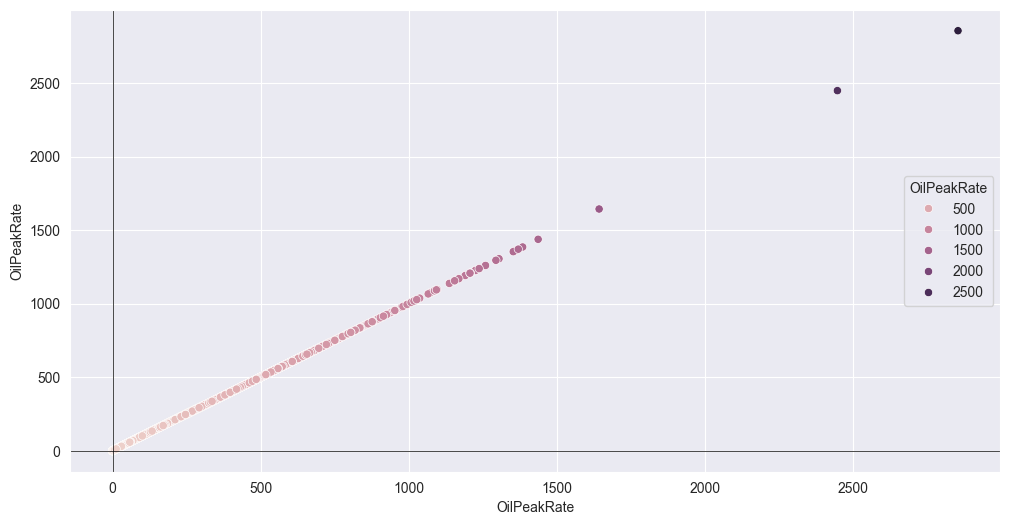

In [15]:
sns.color_palette("hls", 8)
for col in df.columns:
    sns.scatterplot(x=df[col],y=oil_peak_rate, marker='o', hue=oil_peak_rate)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    
    plt.show()
    


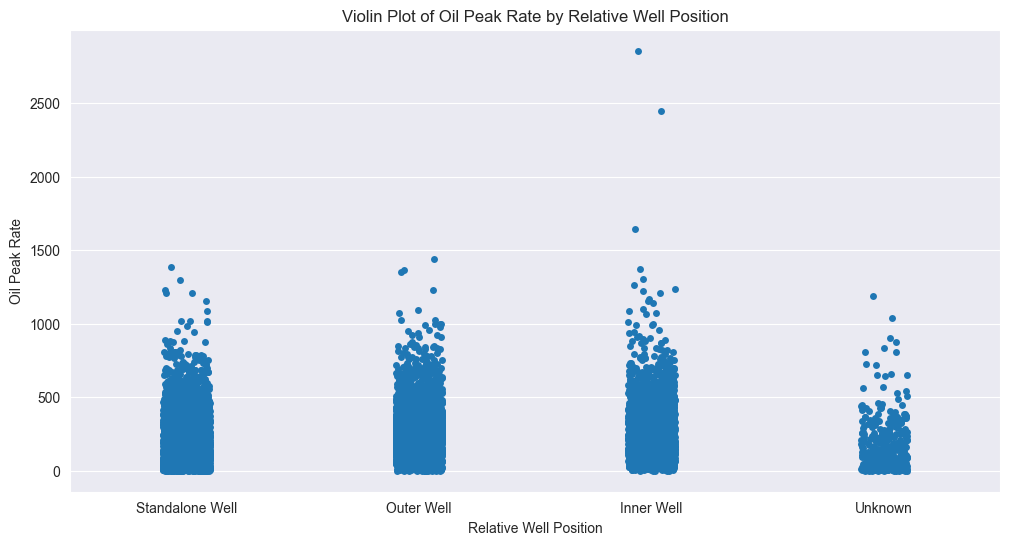

In [16]:

# Assuming 'OilPeakRate' and another categorical variable 'category' are in your dataset
sns.stripplot(x="relative_well_position", y=oil_peak_rate, data=df)
plt.title("Violin Plot of Oil Peak Rate by Relative Well Position")
plt.xlabel("Relative Well Position")
plt.ylabel("Oil Peak Rate")
plt.show()


# Feature Selection

In [17]:
from sklearn.model_selection import train_test_split

df_2 = df.copy()

df_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_2.dropna(inplace=True)
df_2 = pd.get_dummies(df_2, drop_first=True)

X = df_2.drop('OilPeakRate', axis=1)
y = df_2['OilPeakRate']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


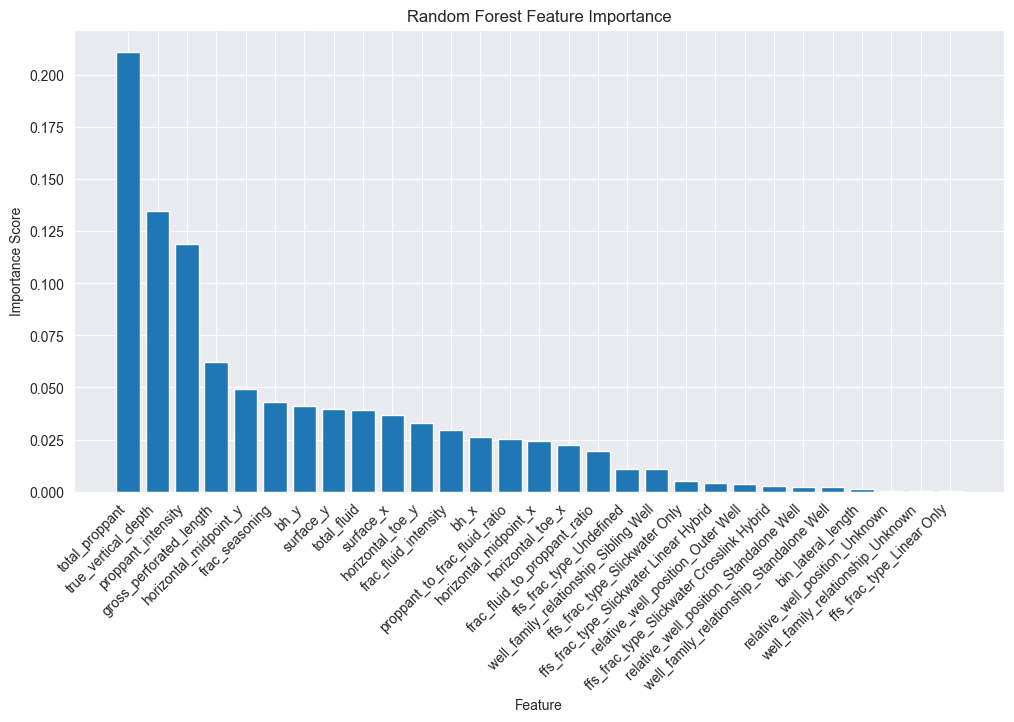

In [18]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Create RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=101)

# Train the model on the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [20]:

rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, rf_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, rf_pred)

# Calculate root mean absolute error
rmae = np.sqrt(mae)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Print the results
print('RMAE:', rmae)
print('RMSE:', rmse)

RMAE: 8.3660523927253
RMSE: 105.84626545270797


In [22]:
from sklearn.model_selection import cross_val_score

# Create the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=101)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error from cross-validation scores
cv_rmse = np.sqrt(-cv_scores)

# Print the cross-validation results
print('Cross-Validation RMSE:', cv_rmse)


Cross-Validation RMSE: [110.43774918  95.7762348   93.15889494  96.59950119  98.58549333]


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create a smaller sample for hyperparameter tuning
X_train_sample, y_train_sample = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 5]
}

# Create the Random Forest Regressor
rf = RandomForestRegressor(random_state=101)

# Perform grid search with cross-validation on the smaller sample
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sample, y_train_sample)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best model for prediction
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}


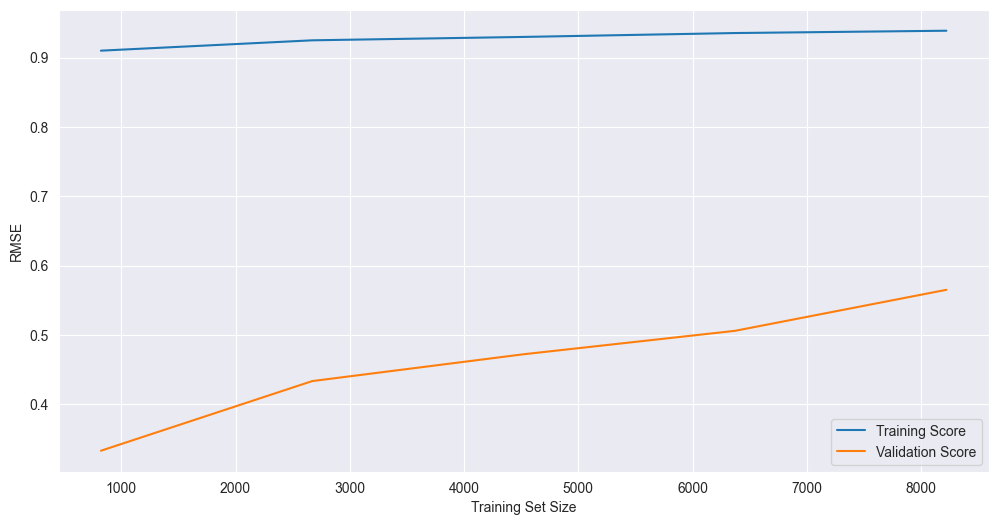

In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Plot learning curves
train_sizes, train_scores, val_scores = learning_curve(best_rf, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [27]:

rf = RandomForestRegressor(n_estimators=100, random_state=101, max_depth=None, min_samples_leaf= 1)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, rf_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, rf_pred)

# Calculate root mean absolute error
rmae = np.sqrt(mae)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Print the results
print('RMAE:', rmae)
print('RMSE:', rmse)


RMAE: 8.3660523927253
RMSE: 105.84626545270797


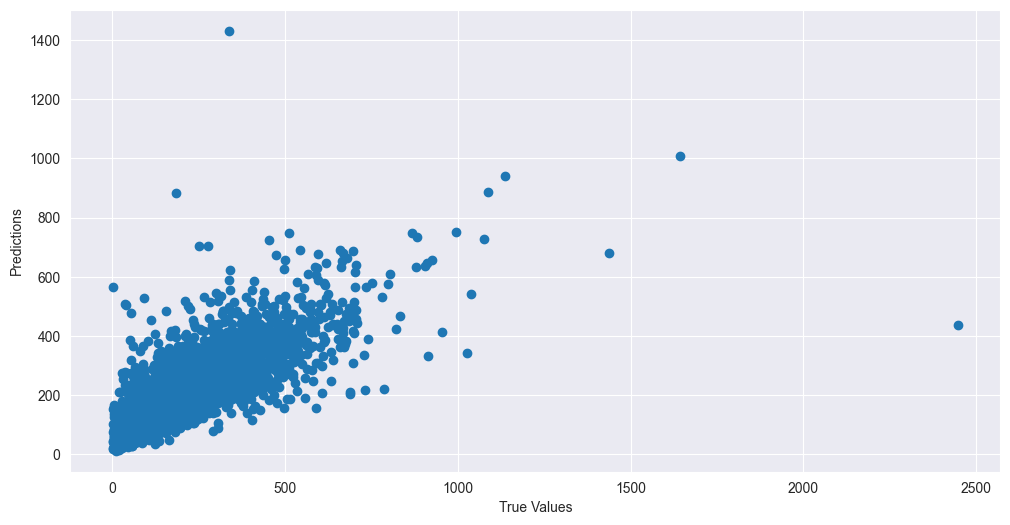

In [28]:

plt.scatter(y_test, rf_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()